In [1]:
#tutorial of prophet python 
#https://www.youtube.com/watch?v=2vF2xTUXJwM
import pandas as pd 
from prophet import Prophet

#not in used yet 
import matplotlib.pyplot as plt

#evaluate the model 
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error, mean_squared_error

Importing plotly failed. Interactive plots will not work.


In [2]:
#reading all the data 
solar0 = pd.read_csv("Solar 0.csv")

In [3]:
solar0

,Unnamed: 0,series_value,datetime,Year,Month,Day_of_Month,Hour,minutes,series_name
0,0,0.00,2020-04-25 14:00:00,2020,4,25,14,0,Solar0
1,4,0.00,2020-04-25 15:00:00,2020,4,25,15,0,Solar0
2,8,0.00,2020-04-25 16:00:00,2020,4,25,16,0,Solar0
3,12,0.00,2020-04-25 17:00:00,2020,4,25,17,0,Solar0
4,16,0.00,2020-04-25 18:00:00,2020,4,25,18,0,Solar0
...,...,...,...,...,...,...,...,...,...
4541,18164,0.01,2020-10-31 19:00:00,2020,10,31,19,0,Solar0
4542,18168,1.45,2020-10-31 20:00:00,2020,10,31,20,0,Solar0
4543,18172,4.69,2020-10-31 21:00:00,2020,10,31,21,0,Solar0
4544,18176,8.73,2020-10-31 22:00:00,2020,10,31,22,0,Solar0


In [4]:
solar0['datetime']=pd.to_datetime(solar0['datetime'], format='%Y-%m-%d %H:%M:%S')

solar0= solar0.set_index('datetime')

solar0= solar0.asfreq('H') 

# will make data consitently, new added row will be  ( datetime , Na ) 
# later prediction made on this may have a bad result 


<AxesSubplot:xlabel='datetime'>

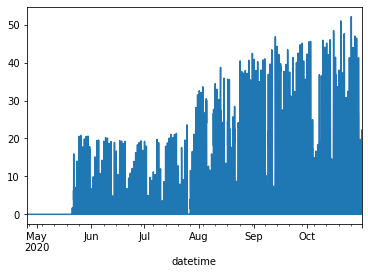

In [5]:
solar0["series_value"].plot()

In [6]:
'''

#Split Train-Val for Solar0
# ==============================================================================
start_train='2020-06-01 00:00'
end_train='2020-09-01 00:00'
start_val='2020-09-01 01:00'
end_val='2020-09-30 23:00'

start_test='2020-10-01 00:00'

solar0train=solar0.loc[start_train:end_train, :]
solar0val=solar0.loc[start_val:end_val, :]
solar0test=solar0.loc[start_test:, :]

'''

end_train='2020-09-30 23:00'

start_test='2020-10-01 00:00'

solar0train = solar0.loc[:end_train,:]

solar0test=solar0.loc[start_test:, :]

In [7]:
solar0train

,Unnamed: 0,series_value,Year,Month,Day_of_Month,Hour,minutes,series_name
datetime,,,,,,,,
2020-04-25 14:00:00,0,0.00,2020,4,25,14,0,Solar0
2020-04-25 15:00:00,4,0.00,2020,4,25,15,0,Solar0
2020-04-25 16:00:00,8,0.00,2020,4,25,16,0,Solar0
2020-04-25 17:00:00,12,0.00,2020,4,25,17,0,Solar0
2020-04-25 18:00:00,16,0.00,2020,4,25,18,0,Solar0
...,...,...,...,...,...,...,...,...
2020-09-30 19:00:00,15188,0.01,2020,9,30,19,0,Solar0
2020-09-30 20:00:00,15192,0.80,2020,9,30,20,0,Solar0
2020-09-30 21:00:00,15196,9.22,2020,9,30,21,0,Solar0


In [8]:
solar0test

,Unnamed: 0,series_value,Year,Month,Day_of_Month,Hour,minutes,series_name
datetime,,,,,,,,
2020-10-01 00:00:00,15208,41.65,2020,10,1,0,0,Solar0
2020-10-01 01:00:00,15212,42.26,2020,10,1,1,0,Solar0
2020-10-01 02:00:00,15216,27.83,2020,10,1,2,0,Solar0
2020-10-01 03:00:00,15220,39.19,2020,10,1,3,0,Solar0
2020-10-01 04:00:00,15224,36.21,2020,10,1,4,0,Solar0
...,...,...,...,...,...,...,...,...
2020-10-31 19:00:00,18164,0.01,2020,10,31,19,0,Solar0
2020-10-31 20:00:00,18168,1.45,2020,10,31,20,0,Solar0
2020-10-31 21:00:00,18172,4.69,2020,10,31,21,0,Solar0


In [9]:
train_s0 = solar0train.reset_index()[["datetime","series_value"]]
train_s0.columns=["ds","y"]
train_s0

,ds,y
0,2020-04-25 14:00:00,0.00
1,2020-04-25 15:00:00,0.00
2,2020-04-25 16:00:00,0.00
3,2020-04-25 17:00:00,0.00
4,2020-04-25 18:00:00,0.00
...,...,...
3797,2020-09-30 19:00:00,0.01
3798,2020-09-30 20:00:00,0.80
3799,2020-09-30 21:00:00,9.22
3800,2020-09-30 22:00:00,23.19


In [10]:
model_s0 = Prophet()
model_s0.fit(train_s0)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [11]:
future_s0 = model_s0.make_future_dataframe(periods=744,freq="H")
future_s0
# end : 2020-10-31 23:00:00

,ds
0,2020-04-25 14:00:00
1,2020-04-25 15:00:00
2,2020-04-25 16:00:00
3,2020-04-25 17:00:00
4,2020-04-25 18:00:00
...,...
4541,2020-10-31 19:00:00
4542,2020-10-31 20:00:00
4543,2020-10-31 21:00:00
4544,2020-10-31 22:00:00


In [12]:
forecast_s0 = model_s0.predict(future_s0)
forecast_s0
#forecast_s0[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-7320:] 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-04-25 14:00:00,-0.703148,-12.893508,1.717156,-0.703148,-0.703148,-4.983910,-4.983910,-4.983910,-4.639262,-4.639262,-4.639262,-0.344648,-0.344648,-0.344648,0.0,0.0,0.0,-5.687058
1,2020-04-25 15:00:00,-0.699339,-12.803903,1.785094,-0.699339,-0.699339,-4.865925,-4.865925,-4.865925,-4.531006,-4.531006,-4.531006,-0.334919,-0.334919,-0.334919,0.0,0.0,0.0,-5.565264
2,2020-04-25 16:00:00,-0.695530,-12.503125,1.691939,-0.695530,-0.695530,-4.564951,-4.564951,-4.564951,-4.241755,-4.241755,-4.241755,-0.323195,-0.323195,-0.323195,0.0,0.0,0.0,-5.260481
3,2020-04-25 17:00:00,-0.691721,-12.385855,2.470364,-0.691721,-0.691721,-4.418784,-4.418784,-4.418784,-4.109245,-4.109245,-4.109245,-0.309539,-0.309539,-0.309539,0.0,0.0,0.0,-5.110505
4,2020-04-25 18:00:00,-0.687912,-12.804752,2.326768,-0.687912,-0.687912,-4.644543,-4.644543,-4.644543,-4.350512,-4.350512,-4.350512,-0.294031,-0.294031,-0.294031,0.0,0.0,0.0,-5.332455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4541,2020-10-31 19:00:00,12.346840,0.435126,14.640910,11.746729,12.873961,-5.024447,-5.024447,-5.024447,-4.747677,-4.747677,-4.747677,-0.276770,-0.276770,-0.276770,0.0,0.0,0.0,7.322393
4542,2020-10-31 20:00:00,12.349808,0.539733,14.725525,11.747641,12.877784,-4.893874,-4.893874,-4.893874,-4.636003,-4.636003,-4.636003,-0.257871,-0.257871,-0.257871,0.0,0.0,0.0,7.455934
4543,2020-10-31 21:00:00,12.352776,0.883002,16.329435,11.748552,12.881608,-3.488171,-3.488171,-3.488171,-3.250706,-3.250706,-3.250706,-0.237464,-0.237464,-0.237464,0.0,0.0,0.0,8.864606
4544,2020-10-31 22:00:00,12.355744,5.044116,18.824503,11.749463,12.885431,-0.441539,-0.441539,-0.441539,-0.225844,-0.225844,-0.225844,-0.215695,-0.215695,-0.215695,0.0,0.0,0.0,11.914205


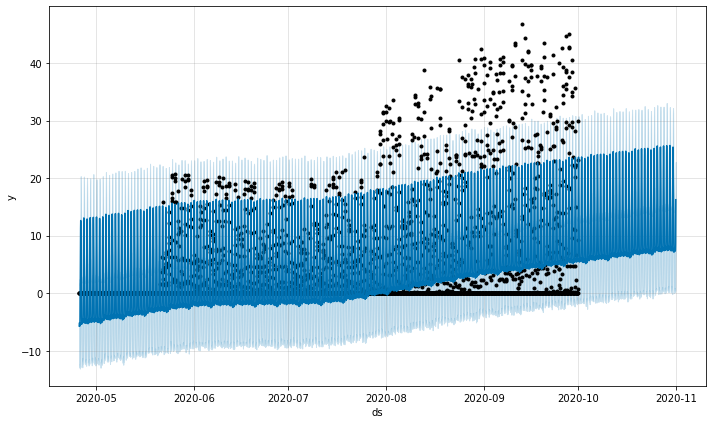

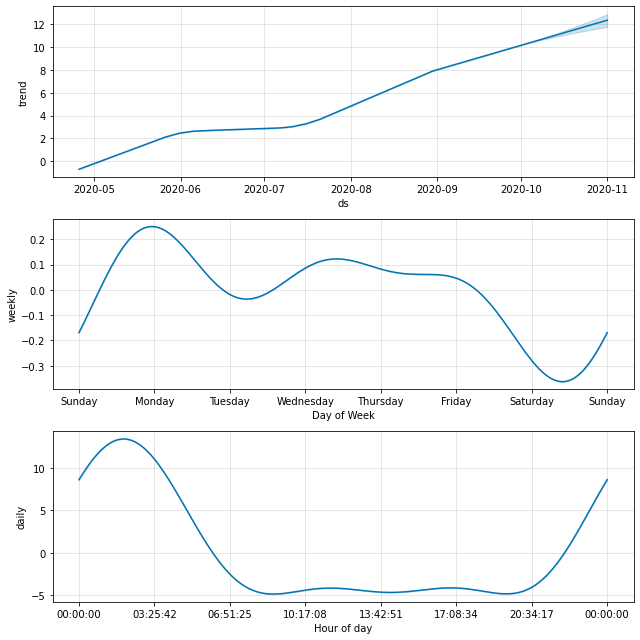

In [13]:
# plot the prediction 
fig= model_s0.plot(forecast_s0)
#plot predictions 
fig= model_s0.plot_components(forecast_s0)

In [14]:
forecast_s0["additive_terms"]
additive_terms =  pd.DataFrame(forecast_s0["additive_terms"])
print(additive_terms)

solar0["series_value"]
actual_value = pd.DataFrame(solar0.reset_index()["series_value"])
actual_value
print(actual_value)

      additive_terms
0          -4.983910
1          -4.865925
2          -4.564951
3          -4.418784
4          -4.644543
...              ...
4541       -5.024447
4542       -4.893874
4543       -3.488171
4544       -0.441539
4545        3.883053

[4546 rows x 1 columns]
      series_value
0             0.00
1             0.00
2             0.00
3             0.00
4             0.00
...            ...
4541          0.01
4542          1.45
4543          4.69
4544          8.73
4545         22.23

[4546 rows x 1 columns]


In [15]:
sub =actual_value["series_value"]-additive_terms["additive_terms"]

output =  pd.DataFrame(solar0.reset_index()["datetime"])
output["subtraction"] = sub
output["additive_terms"] = forecast_s0["additive_terms"]
output["actual_value"] = actual_value["series_value"]
output = output.dropna()

output 


,datetime,subtraction,additive_terms,actual_value
0,2020-04-25 14:00:00,4.983910,-4.983910,0.00
1,2020-04-25 15:00:00,4.865925,-4.865925,0.00
2,2020-04-25 16:00:00,4.564951,-4.564951,0.00
3,2020-04-25 17:00:00,4.418784,-4.418784,0.00
4,2020-04-25 18:00:00,4.644543,-4.644543,0.00
...,...,...,...,...
4541,2020-10-31 19:00:00,5.034447,-5.024447,0.01
4542,2020-10-31 20:00:00,6.343874,-4.893874,1.45
4543,2020-10-31 21:00:00,8.178171,-3.488171,4.69
4544,2020-10-31 22:00:00,9.171539,-0.441539,8.73


In [16]:
output.to_csv("s0_actual_additive.csv",index=False)